In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}


In [2]:
# Read movie lens dataset in this project I'm using movielens lastest-small dataset
# which contains ~100,000 ratings and 3,600 tag applications applied to ~9,700 movies
# by 610 users. last updated 9/2018
movies = pd.read_csv('movies.csv')

In [3]:
# read the some first entries from movies.csv
# movies table contains movieId, title and genres
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
print(movies.shape)

(9742, 3)


In [5]:
# read the some first entries from ratings.csv
# ratings table contains userId,movieId, rating and timestamp
ratings = pd.read_csv('ratings.csv')

In [6]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [7]:
print(ratings.shape)

(100836, 4)


In [8]:

# There many different criteria for rating a movie. 
# I'm going to find the mean rating for each users.
# In this project we can assume that the movie which got rating higher than the mean rating of each user 
# can be considered as favorite movie

In [9]:
ratings[ratings['userId']==1].rating.mean()

4.366379310344827

In [10]:
ratings[ratings['userId']==2].rating.mean()

3.9482758620689653

In [11]:
# We can calculate rating per user

In [12]:
mean_rating_per_user = ratings.groupby(['userId']).mean().reset_index()
mean_rating_per_user['mean_rating']= mean_rating_per_user['rating']
mean_rating_per_user.drop(['movieId','rating','timestamp'],axis=1,inplace=True)

In [13]:
# The table below shows the mean rating of the first 10 users
mean_rating_per_user.head(10)

,userId,mean_rating
0,1,4.366379
1,2,3.948276
2,3,2.435897
3,4,3.555556
4,5,3.636364
5,6,3.493631
6,7,3.230263
7,8,3.574468
8,9,3.260870
9,10,3.278571


In [14]:
# I'm going to generat a new table which contains the mean rating of each users
ratings = pd.merge(ratings, mean_rating_per_user, on=['userId','userId'])

In [15]:
ratings.head(100)

,userId,movieId,rating,timestamp,mean_rating
0,1,1,4.0,964982703,4.366379
1,1,3,4.0,964981247,4.366379
2,1,6,4.0,964982224,4.366379
3,1,47,5.0,964983815,4.366379
4,1,50,5.0,964982931,4.366379
...,...,...,...,...,...
95,1,1445,3.0,964984112,4.366379
96,1,1473,4.0,964980875,4.366379
97,1,1500,4.0,964980985,4.366379
98,1,1517,5.0,964981107,4.366379


In [16]:
# Now I will remove all the movies that were rated by each users 
# and have the rating score below mean rating of each user.

# filter out all movies that have rating > than the mean rating for each user.
# This means all movies in this table can be considered as favorite movie of each user
ratings = ratings.drop(ratings[ratings.rating < ratings.mean_rating].index)

In [17]:
# this is example of the favorite movies of user 1
ratings[ratings['userId']==1].head(10)

,userId,movieId,rating,timestamp,mean_rating
3,1,47,5.0,964983815,4.366379
4,1,50,5.0,964982931,4.366379
6,1,101,5.0,964980868,4.366379
8,1,151,5.0,964984041,4.366379
9,1,157,5.0,964984100,4.366379
10,1,163,5.0,964983650,4.366379
11,1,216,5.0,964981208,4.366379
13,1,231,5.0,964981179,4.366379
15,1,260,5.0,964981680,4.366379
18,1,333,5.0,964981179,4.366379


In [18]:
# this is example of the favorite movies of user 1
ratings[ratings['userId']==2].head(10)

,userId,movieId,rating,timestamp,mean_rating
233,2,333,4.0,1445715029,3.948276
234,2,1704,4.5,1445715228,3.948276
235,2,3578,4.0,1445714885,3.948276
236,2,6874,4.0,1445714952,3.948276
238,2,46970,4.0,1445715013,3.948276
239,2,48516,4.0,1445715064,3.948276
240,2,58559,4.5,1445715141,3.948276
241,2,60756,5.0,1445714980,3.948276
242,2,68157,4.5,1445715154,3.948276
244,2,74458,4.0,1445714926,3.948276


In [19]:
# there are 54732 ratings data by 610 users in the ratings table after filtere
print(ratings.shape)

(54732, 5)


In [20]:
# getting the information from ratings table. this shows that there are 610 users
ratings['userId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [21]:
ratings = ratings.rename({'rating':'userRating'},axis='columns')

In [22]:
#Merge 2 dataset movies and ratings

mergedata= pd.merge(movies,ratings,on=['movieId','movieId'])
mergedata.head(10)

,movieId,title,genres,userId,userRating,timestamp,mean_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,3.636364
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,3.230263
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,4.209524
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,4.0,965705637,2.607397
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,21,3.5,1407618878,3.260722
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,5.0,850466616,3.920000
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,40,5.0,832058959,3.766990
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,43,5.0,848993983,4.552632
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,45,4.0,951170182,3.875940
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,46,5.0,834787906,4.000000


In [23]:
# number of favorite movies by all users
len(mergedata['movieId'].unique())

7141

In [24]:
#number of movies in original movie dataset
len(movies['movieId'].unique())

9742

In [25]:
# Now I will cluster the users to group
# first create a cross table to show the detail of movies which each user like
user_movie = pd.crosstab(mergedata['userId'],mergedata['title'])

In [27]:
user_movie.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),...,Zombieland (2009),Zookeeper (2011),Zoolander (2001),Zootopia (2016),Zulu (1964),[REC] (2007),[REC]² (2009),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
user_movie.shape

(610, 7138)

In [29]:
# using principle component analyis to convert the original variables to a new set of variables
# the main goal is to reduce dimension of data for clustering and visualize


In [30]:
# let apply pca to our data set with n_components=3 this will project our original data onto a three-dimensional subspace. 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(user_movie)
pca_samples = pca.transform(user_movie)

In [31]:
ps= pd.DataFrame(pca_samples)

In [32]:
ps.head()

,0,1,2
0,1.557887,1.024908,-1.523535
1,-1.773112,-0.665630,0.558772
2,-2.160588,0.072821,0.061262
3,0.823215,2.578686,0.229750
4,-1.689254,0.476382,-0.372894


In [33]:
ps

,0,1,2
0,1.557887,1.024908,-1.523535
1,-1.773112,-0.665630,0.558772
2,-2.160588,0.072821,0.061262
3,0.823215,2.578686,0.229750
4,-1.689254,0.476382,-0.372894
...,...,...,...
605,7.865188,5.417954,7.224669
606,0.551144,1.361423,-2.027852
607,7.837084,-1.594369,-0.550034
608,-2.003510,0.077695,-0.060607


In [35]:
makecluster = pd.DataFrame(ps[[0,1,2]])

In [36]:
print(makecluster)

             0         1         2
0     1.557887  1.024908 -1.523535
1    -1.773112 -0.665630  0.558772
2    -2.160588  0.072821  0.061262
3     0.823215  2.578686  0.229750
4    -1.689254  0.476382 -0.372894
..         ...       ...       ...
605   7.865188  5.417954  7.224669
606   0.551144  1.361423 -2.027852
607   7.837084 -1.594369 -0.550034
608  -2.003510  0.077695 -0.060607
609  10.652531 -5.106637  3.194291

[610 rows x 3 columns]


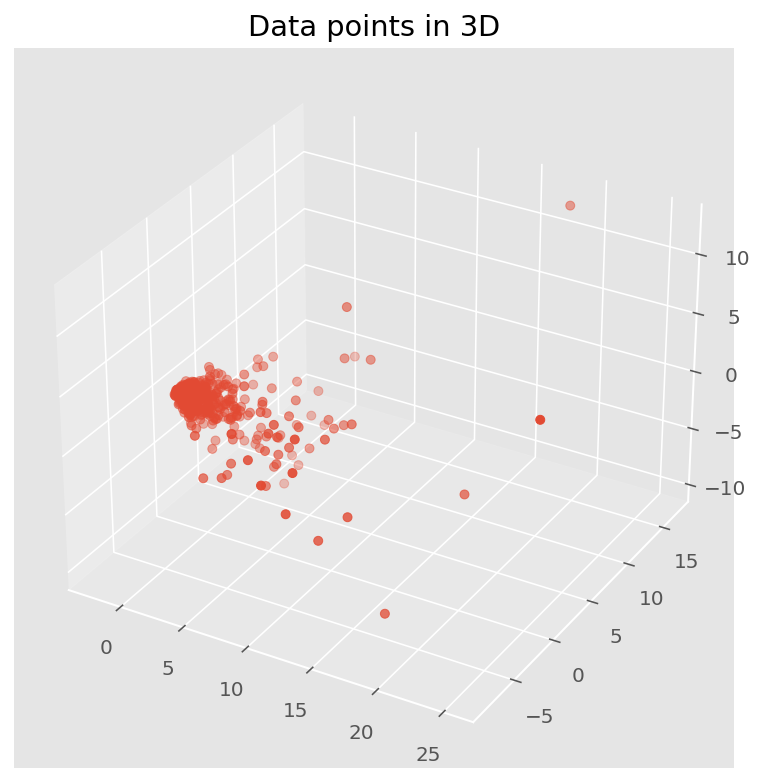

In [33]:
plt.rcParams['figure.figsize']=(10,5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(makecluster[0], makecluster[1], makecluster[2])
plt.title('Data points in 3D')
plt.show()

In [34]:
# now we need to find number of k for clustering
# we can use kmean to find the cluster
from sklearn.cluster import KMeans


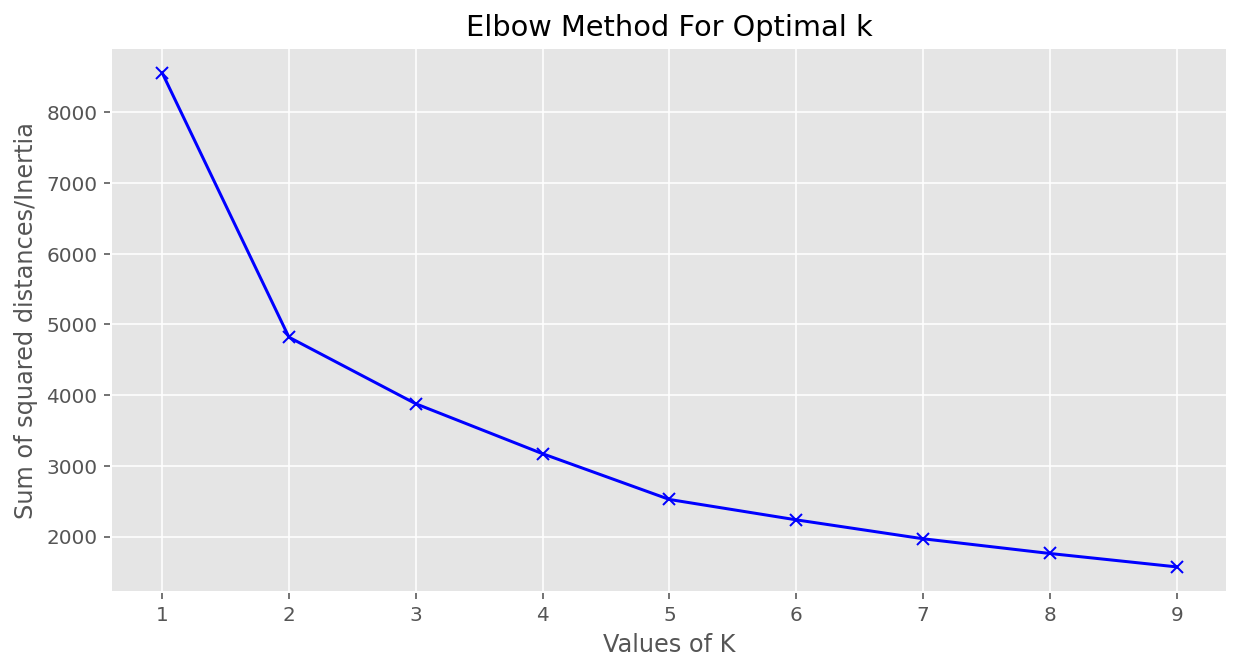

In [35]:
# In this project, I will use a well-known method (The elbow method) for determining the optimal number of cluser 

sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K:
    kmeans= KMeans(n_clusters=num_clusters)
    kmeans.fit(makecluster)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K,sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [36]:
# As expected the plot look like an armbut the elbow is not clear
# unfortunately, we do not always have cleared cluster data
# for this dataset, we could choose k to be either 3 or 4 which I think will be good to have 
# 3 or 4 groups of users for recommendation system.

In [42]:
# K mean clustering
# choose k = 4
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=4, random_state=30).fit(makecluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(makecluster)

print(centers)

[[-1.29530025  0.1266522  -0.01675306]
 [10.74626585 -3.0015691  -0.54300657]
 [ 5.05216545  3.62778271 -1.02635925]
 [ 1.82226712 -1.32805938  0.58763994]]


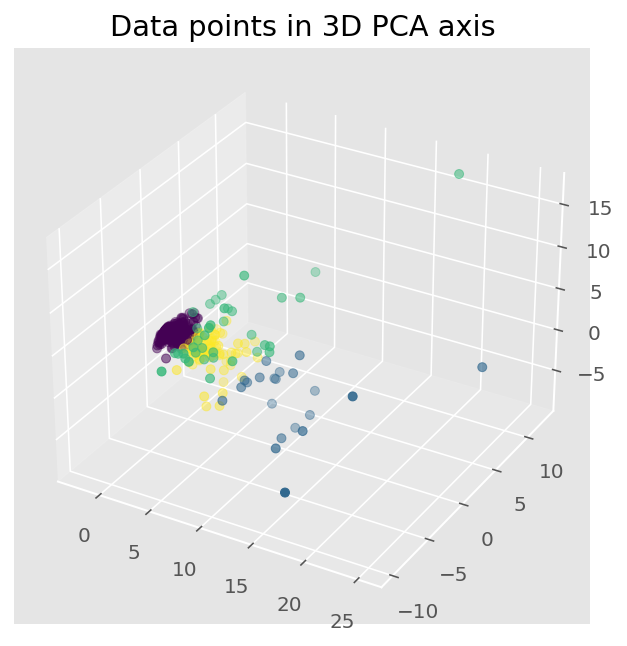

In [43]:
fig = plt.figure()
ax=Axes3D(fig)
ax.scatter(makecluster[0],makecluster[2],makecluster[1],c=c_preds)
plt.title('Data points in 3D PCA axis')
plt.show()

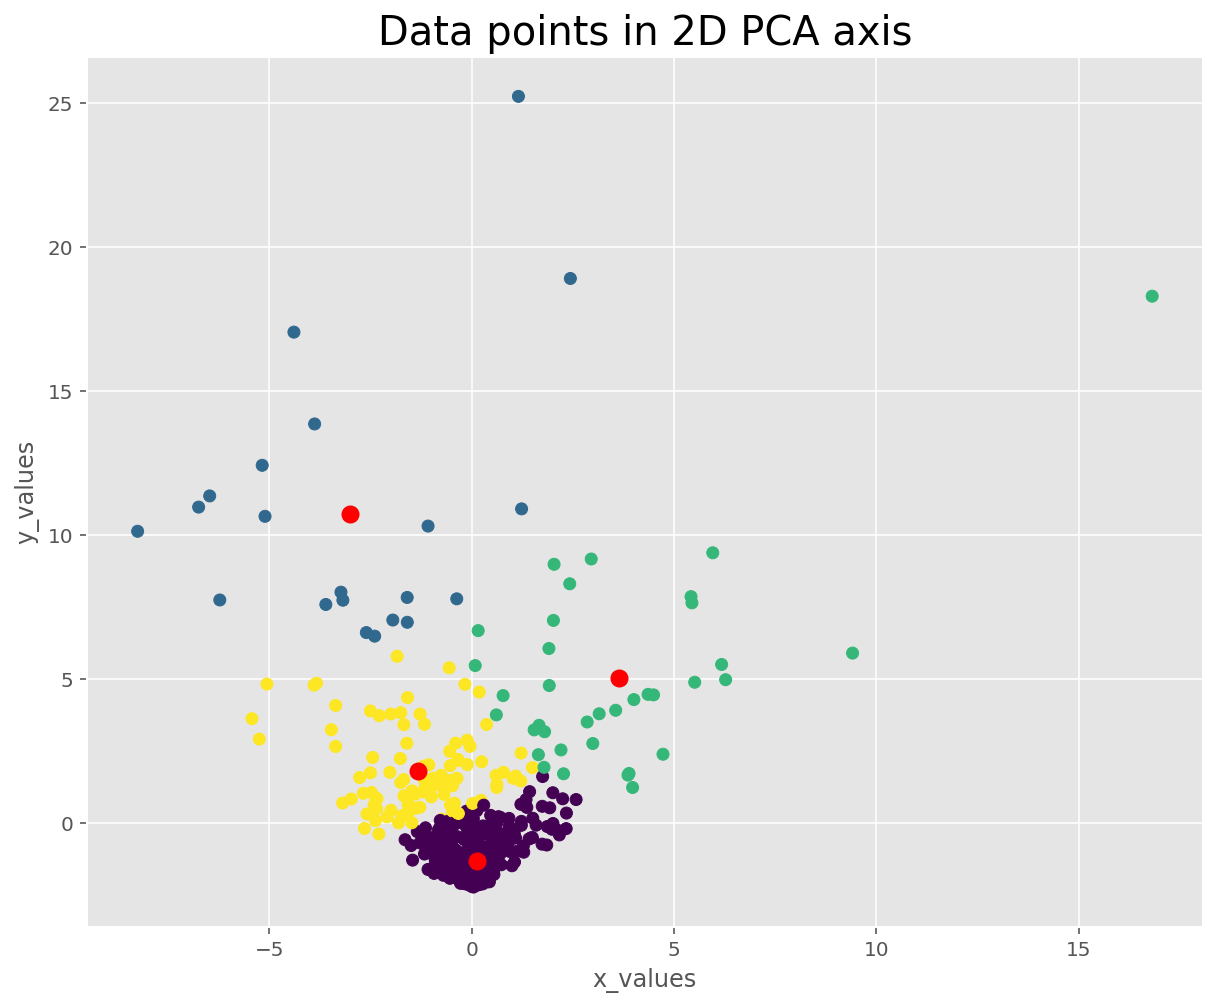

In [44]:
fig = plt.figure(figsize=(10,8))
plt.scatter(makecluster[1],makecluster[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()

In [45]:
user_movie['cluster']=c_preds
user_movie.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),...,Zookeeper (2011),Zoolander (2001),Zootopia (2016),Zulu (1964),[REC] (2007),[REC]² (2009),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986),cluster
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
user_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 1 to 610
Columns: 7139 entries, '71 (2014) to cluster
dtypes: int32(1), int64(7138)
memory usage: 33.2 MB


In [47]:
# next we can use characteristic of each cluster
# here are 4 clusters that the users belong to.
# I'm going to use these clusters to find the favorite genres of each cluster 
cluster0 = user_movie[user_movie['cluster']==0].drop('cluster',axis=1).mean()
cluster1 = user_movie[user_movie['cluster']==1].drop('cluster',axis=1).mean()
cluster2 = user_movie[user_movie['cluster']==2].drop('cluster',axis=1).mean()
cluster3 = user_movie[user_movie['cluster']==3].drop('cluster',axis=1).mean()

In [48]:
#We can say the top 20 movie will explain the characteristic of the cluster 0
cluster0.sort_values(ascending=False)[0:20]

title
Shawshank Redemption, The (1994)                                                  0.362637
Forrest Gump (1994)                                                               0.305495
Pulp Fiction (1994)                                                               0.298901
Silence of the Lambs, The (1991)                                                  0.287912
Braveheart (1995)                                                                 0.228571
Matrix, The (1999)                                                                0.228571
Schindler's List (1993)                                                           0.221978
Star Wars: Episode IV - A New Hope (1977)                                         0.206593
Fugitive, The (1993)                                                              0.195604
Jurassic Park (1993)                                                              0.193407
Usual Suspects, The (1995)                                                        0.

In [49]:
#We can say the top 20 movie will explain the characteristic of the cluster 1
cluster1.sort_values(ascending=False)[0:20]

title
Star Wars: Episode VI - Return of the Jedi (1983)                                 0.952381
Lord of the Rings: The Two Towers, The (2002)                                     0.952381
Star Wars: Episode V - The Empire Strikes Back (1980)                             0.952381
Fight Club (1999)                                                                 0.904762
Pulp Fiction (1994)                                                               0.904762
Lord of the Rings: The Return of the King, The (2003)                             0.904762
Star Wars: Episode IV - A New Hope (1977)                                         0.904762
Batman Begins (2005)                                                              0.904762
Matrix, The (1999)                                                                0.904762
Seven (a.k.a. Se7en) (1995)                                                       0.904762
Departed, The (2006)                                                              0.

In [50]:
#We can say the top 20 movie will explain the characteristic of the cluster 2
cluster2.sort_values(ascending=False)[0:20]

title
Pulp Fiction (1994)                                                               0.837838
Star Wars: Episode IV - A New Hope (1977)                                         0.810811
Fargo (1996)                                                                      0.810811
Silence of the Lambs, The (1991)                                                  0.783784
Matrix, The (1999)                                                                0.783784
Godfather, The (1972)                                                             0.783784
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.756757
Reservoir Dogs (1992)                                                             0.756757
American Beauty (1999)                                                            0.729730
Star Wars: Episode V - The Empire Strikes Back (1980)                             0.729730
Terminator 2: Judgment Day (1991)                                                 0.

In [51]:
#We can say the top 20 movie will explain the characteristic of the cluster 0
cluster3.sort_values(ascending=False)[0:20]

title
Shawshank Redemption, The (1994)                                                  0.680412
Matrix, The (1999)                                                                0.670103
Forrest Gump (1994)                                                               0.659794
Fight Club (1999)                                                                 0.649485
Lord of the Rings: The Return of the King, The (2003)                             0.649485
Lord of the Rings: The Fellowship of the Ring, The (2001)                         0.567010
Star Wars: Episode IV - A New Hope (1977)                                         0.556701
Lord of the Rings: The Two Towers, The (2002)                                     0.546392
Star Wars: Episode V - The Empire Strikes Back (1980)                             0.546392
Pulp Fiction (1994)                                                               0.546392
Dark Knight, The (2008)                                                           0.

In [52]:
# Function to collect the information of a list of movie

def getMovieInfo(movies_list):
    list_of_genre = []
    list_of_rating= []
    
    #loop through the list of movies
    for movie in mergedata['title']:
        if movie in movies_list:
            list_of_rating.append(mergedata[mergedata['title']==movie].userRating.values.astype(int))
            for y in mergedata[mergedata['title']==movie].genres.values:
                list_of_genre.append(y)
    return list_of_genre,list_of_rating

In [53]:
# get a list of movie in cluster 0
movie_list_0 = list(cluster0.sort_values(ascending=False)[0:20].index)
print(movie_list_0)

['Shawshank Redemption, The (1994)', 'Forrest Gump (1994)', 'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)', 'Braveheart (1995)', 'Matrix, The (1999)', "Schindler's List (1993)", 'Star Wars: Episode IV - A New Hope (1977)', 'Fugitive, The (1993)', 'Jurassic Park (1993)', 'Usual Suspects, The (1995)', 'Terminator 2: Judgment Day (1991)', 'Apollo 13 (1995)', 'Fight Club (1999)', 'Toy Story (1995)', 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)', 'Godfather, The (1972)', 'Seven (a.k.a. Se7en) (1995)', 'Fargo (1996)', 'Lion King, The (1994)']


In [54]:
# get a list of movie in cluster 1,2,3
movie_list_1= list(cluster1.sort_values(ascending=False)[0:20].index)
movie_list_2 = list(cluster2.sort_values(ascending=False)[0:20].index)
movie_list_3 = list(cluster3.sort_values(ascending=False)[0:20].index)

In [55]:
print(movie_list_1)

['Star Wars: Episode VI - Return of the Jedi (1983)', 'Lord of the Rings: The Two Towers, The (2002)', 'Star Wars: Episode V - The Empire Strikes Back (1980)', 'Fight Club (1999)', 'Pulp Fiction (1994)', 'Lord of the Rings: The Return of the King, The (2003)', 'Star Wars: Episode IV - A New Hope (1977)', 'Batman Begins (2005)', 'Matrix, The (1999)', 'Seven (a.k.a. Se7en) (1995)', 'Departed, The (2006)', 'Gladiator (2000)', 'Boondock Saints, The (2000)', 'Terminator 2: Judgment Day (1991)', 'Jurassic Park (1993)', 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)', '300 (2007)', 'Finding Nemo (2003)', 'Lord of the Rings: The Fellowship of the Ring, The (2001)', 'Indiana Jones and the Last Crusade (1989)']


In [56]:
list_of_genre_0,list_of_rating_0 =getMovieInfo(movie_list_0)
list_of_genre_1,list_of_rating_1 =getMovieInfo(movie_list_1)
list_of_genre_2,list_of_rating_2 =getMovieInfo(movie_list_2)
list_of_genre_3,list_of_rating_3 =getMovieInfo(movie_list_3)

In [52]:
list_of_genre_0[2]

'Adventure|Animation|Children|Comedy|Fantasy'

In [53]:
print(list_of_rating_0[1:2])

[array([4, 4, 4, 4, 3, 5, 5, 5, 4, 5, 3, 5, 5, 4, 5, 4, 4, 4, 4, 5, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 5, 3, 4, 5, 5, 4, 4, 4, 4, 5,
       4, 5, 3, 4, 3, 5, 3, 3, 5, 3, 5, 5, 5, 4, 4, 4, 4, 4, 5, 5, 5, 4,
       5, 4, 4, 4, 4, 4, 3, 5, 4, 3, 3, 5, 4, 4, 3, 5, 5, 4, 5, 5, 4, 5,
       5, 4, 5, 4, 4, 5, 5, 4, 5, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 4, 4, 4,
       4, 5, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4,
       4, 3, 4, 5, 4, 5, 5, 4, 4, 4, 3, 4, 4, 4, 5])]


In [77]:
# create function to count the key words, count the number of each keyword for genres
# in order to illutrate the visualize image
def count_genre_word2(df, list_genre ):
    counter = dict()
    #set the counter for each genre to 0
    for gen in list_genre: counter[gen]=0
        
    for keywords in df['genre'].str.split('|'):
        
        if type(keywords) == float and pd.isnull(keywords):
            continue
        for s in [s for s in keywords if s in list_genre]:
#            print("true s is in list")
            if pd.notnull(s):
                counter[s]+=1

    
    # convert the dict in a list to sort the keywords by frequency
    keyword_occurences = []
    for key,value in counter.items():
        keyword_occurences.append([key,value])
    keyword_occurences.sort(key=lambda x:x[1],reverse=True)
    return keyword_occurences, counter

In [58]:
def get_set_keywords(data):
    set_keywords=set()
    for l in data['genre'].str.split('|').values:
        if isinstance(l,float):continue
        set_keywords = set_keywords.union(l)
    return set_keywords

In [59]:
data_cluster_0 = pd.DataFrame()
data_cluster_0['genre']=list_of_genre_0

data_cluster_1 = pd.DataFrame()
data_cluster_1['genre']=list_of_genre_1

data_cluster_2 = pd.DataFrame()
data_cluster_2['genre']=list_of_genre_2

data_cluster_3 = pd.DataFrame()
data_cluster_3['genre']=list_of_genre_3
test_cluster =pd.DataFrame()
test_cluster['genre']=data_cluster_0['genre'][0:3]

In [60]:
print(data_cluster_0)

                                              genre
0       Adventure|Animation|Children|Comedy|Fantasy
1       Adventure|Animation|Children|Comedy|Fantasy
2       Adventure|Animation|Children|Comedy|Fantasy
3       Adventure|Animation|Children|Comedy|Fantasy
4       Adventure|Animation|Children|Comedy|Fantasy
...                                             ...
652087                  Action|Crime|Drama|Thriller
652088                  Action|Crime|Drama|Thriller
652089                  Action|Crime|Drama|Thriller
652090                  Action|Crime|Drama|Thriller
652091                  Action|Crime|Drama|Thriller

[652092 rows x 1 columns]


In [61]:
print(test_cluster)

                                         genre
0  Adventure|Animation|Children|Comedy|Fantasy
1  Adventure|Animation|Children|Comedy|Fantasy
2  Adventure|Animation|Children|Comedy|Fantasy


In [62]:
test_set_keywords= get_set_keywords(test_cluster)

In [63]:
print(test_set_keywords)

{'Comedy', 'Children', 'Animation', 'Adventure', 'Fantasy'}


In [66]:
test_keyword_occ0, test_dum0 = count_genre_word2(test_cluster,test_set_keywords)

In [67]:
set_keywords_0= get_set_keywords(data_cluster_0)
set_keywords_1= get_set_keywords(data_cluster_1)
set_keywords_2= get_set_keywords(data_cluster_2)
set_keywords_3= get_set_keywords(data_cluster_3)

In [68]:
print(test_keyword_occ0)

[['Comedy', 3], ['Children', 3], ['Animation', 3], ['Adventure', 3], ['Fantasy', 3]]


In [69]:
print(data_cluster_1['genre'])

0                Mystery|Thriller
1                Mystery|Thriller
2                Mystery|Thriller
3                Mystery|Thriller
4                Mystery|Thriller
                   ...           
436220    Action|Fantasy|War|IMAX
436221    Action|Fantasy|War|IMAX
436222    Action|Fantasy|War|IMAX
436223    Action|Fantasy|War|IMAX
436224    Action|Fantasy|War|IMAX
Name: genre, Length: 436225, dtype: object


In [70]:
print(set_keywords_0)
# print(set_keywords_1)
# print(set_keywords_2)
# print(set_keywords_3)

{'Mystery', 'Fantasy', 'Comedy', 'Horror', 'Thriller', 'Sci-Fi', 'Romance', 'Adventure', 'War', 'Children', 'IMAX', 'Musical', 'Crime', 'Animation', 'Action', 'Drama'}


In [71]:
print(data_cluster_0)

                                              genre
0       Adventure|Animation|Children|Comedy|Fantasy
1       Adventure|Animation|Children|Comedy|Fantasy
2       Adventure|Animation|Children|Comedy|Fantasy
3       Adventure|Animation|Children|Comedy|Fantasy
4       Adventure|Animation|Children|Comedy|Fantasy
...                                             ...
652087                  Action|Crime|Drama|Thriller
652088                  Action|Crime|Drama|Thriller
652089                  Action|Crime|Drama|Thriller
652090                  Action|Crime|Drama|Thriller
652091                  Action|Crime|Drama|Thriller

[652092 rows x 1 columns]


In [73]:
keyword_occ0, dum0 = count_genre_word2(data_cluster_0,set_keywords_0)
keyword_occ1, dum1 = count_genre_word2(data_cluster_1,set_keywords_1)
keyword_occ2, dum2 = count_genre_word2(data_cluster_2,set_keywords_2)
keyword_occ3, dum3 = count_genre_word2(data_cluster_3,set_keywords_3)

In [74]:
print(data_cluster_1)

                          genre
0              Mystery|Thriller
1              Mystery|Thriller
2              Mystery|Thriller
3              Mystery|Thriller
4              Mystery|Thriller
...                         ...
436220  Action|Fantasy|War|IMAX
436221  Action|Fantasy|War|IMAX
436222  Action|Fantasy|War|IMAX
436223  Action|Fantasy|War|IMAX
436224  Action|Fantasy|War|IMAX

[436225 rows x 1 columns]


In [75]:
print(keyword_occ0[0:4])

[['Drama', 355767], ['Thriller', 293304], ['Crime', 280499], ['Action', 219748]]


In [76]:
print(keyword_occ1[0:4])

[['Action', 296489], ['Adventure', 235590], ['Thriller', 188204], ['Sci-Fi', 181233]]


In [72]:
from wordcloud import WordCloud


def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]
        wordcloud = WordCloud(
                      width=1500,
                      height=500, 
                      background_color=color, 
                      max_words=20,
                      max_font_size=500, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)
        
    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

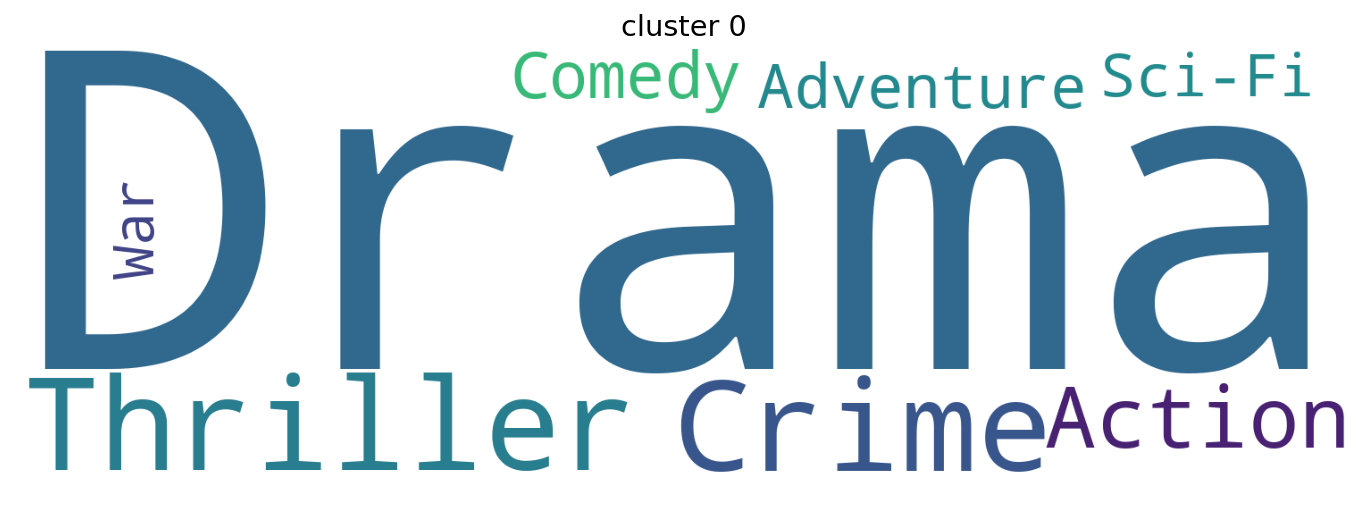

In [73]:
makeCloud(keyword_occ0[0:8],"cluster 0","white")

In [74]:
print(keyword_occ0[0:8])

[['Drama', 355767], ['Thriller', 293304], ['Crime', 280499], ['Action', 219748], ['Comedy', 157524], ['Adventure', 140007], ['Sci-Fi', 131863], ['War', 119195]]


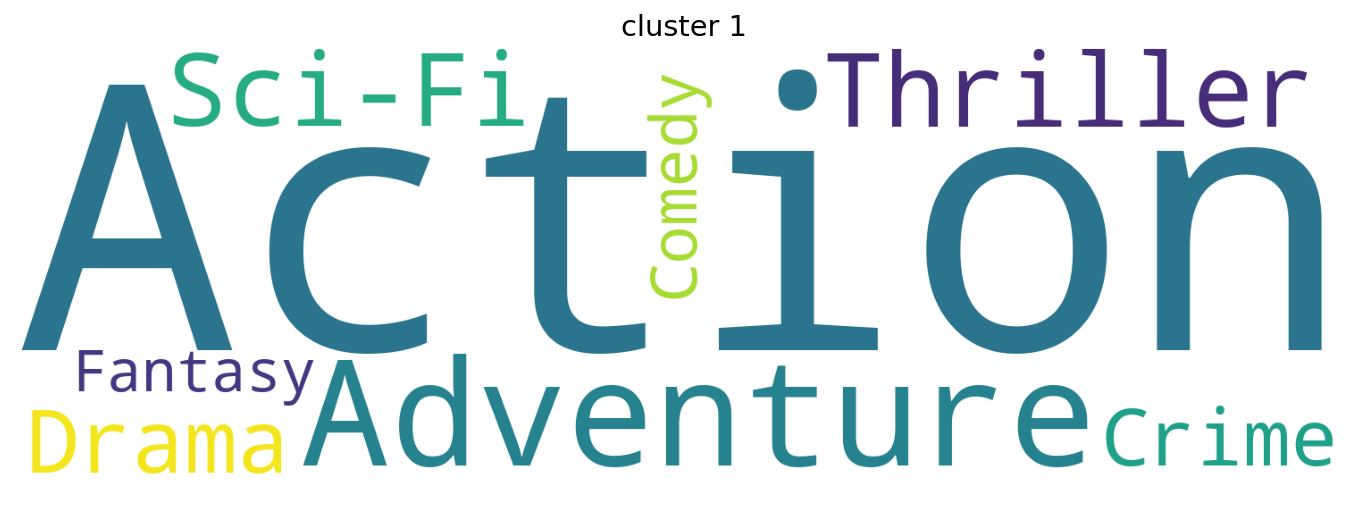

In [75]:
makeCloud(keyword_occ1[0:8],"cluster 1","white")

In [76]:
print(keyword_occ1[0:5])

[['Action', 296489], ['Adventure', 235590], ['Thriller', 188204], ['Sci-Fi', 181233], ['Drama', 133024]]


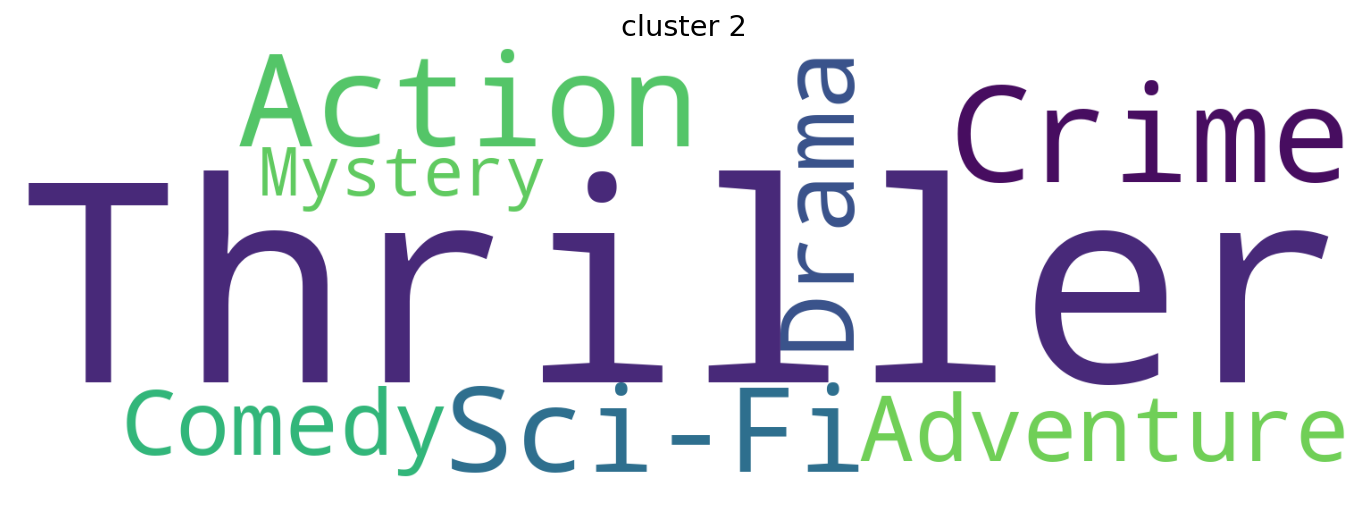

In [77]:
makeCloud(keyword_occ2[0:8],"cluster 2","white")

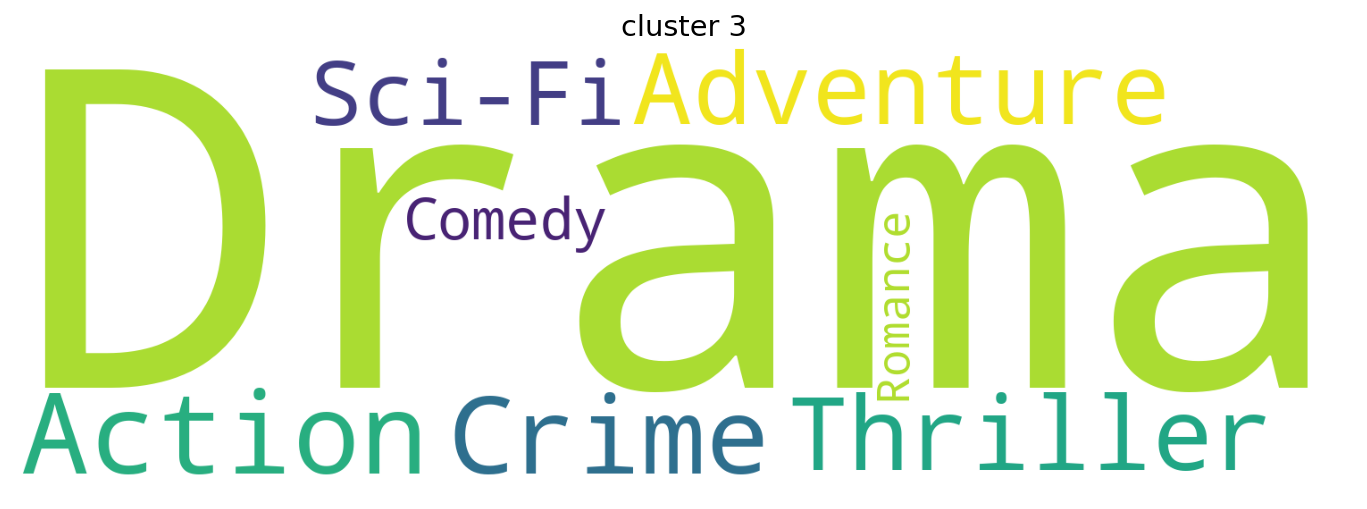

In [78]:
makeCloud(keyword_occ3[0:8],"cluster 3","white")

In [79]:
print(keyword_occ0[0:8])
print(keyword_occ1[0:8])
print(keyword_occ2[0:8])
print(keyword_occ3[0:8])

[['Drama', 355767], ['Thriller', 293304], ['Crime', 280499], ['Action', 219748], ['Comedy', 157524], ['Adventure', 140007], ['Sci-Fi', 131863], ['War', 119195]]
[['Action', 296489], ['Adventure', 235590], ['Thriller', 188204], ['Sci-Fi', 181233], ['Drama', 133024], ['Crime', 105079], ['Comedy', 67937], ['Fantasy', 66783]]
[['Thriller', 240189], ['Crime', 194099], ['Action', 184077], ['Sci-Fi', 171690], ['Drama', 128096], ['Adventure', 114952], ['Comedy', 113477], ['Mystery', 59974]]
[['Drama', 298914], ['Action', 260755], ['Crime', 234563], ['Thriller', 212299], ['Adventure', 202134], ['Sci-Fi', 158168], ['Comedy', 140283], ['Romance', 83582]]


In [80]:
print(user_movie['cluster'])

userId
1      3
2      0
3      0
4      0
5      0
      ..
606    2
607    0
608    1
609    0
610    1
Name: cluster, Length: 610, dtype: int32


In [81]:
import numpy as np

In [82]:
dfu = pd.DataFrame(user_movie['cluster'])
print(dfu)

        cluster
userId         
1             3
2             0
3             0
4             0
5             0
...         ...
606           2
607           0
608           1
609           0
610           1

[610 rows x 1 columns]


In [83]:
# Filter user based on cluster
rslt_df = dfu[dfu["cluster"]==1]

In [84]:
print(rslt_df)

        cluster
userId         
68            1
177           1
219           1
226           1
232           1
249           1
274           1
298           1
305           1
307           1
380           1
414           1
438           1
448           1
477           1
480           1
483           1
561           1
599           1
608           1
610           1


In [85]:
# The cluster that user 3 belong to
print(user_movie.at[15,"cluster"])

3


In [86]:
# The cluster that user 391 belong to
print(user_movie.at[391,"cluster"])

2


In [87]:
# get all the movie that user X has watched
# userId= 7


In [88]:
# INPUT THE USER ID HERE

ratings_origin = pd.read_csv('ratings.csv')


In [89]:
# Get a list of user X has watched

def getListMovieOfUserX(userId):
    new_user_tab=ratings_origin[ratings_origin['userId']==userId]
    return new_user_tab["movieId"].tolist()

# list_userX_movie = getListMovieOfUserX(userId)

In [90]:
# print(list_userX_movie)

In [91]:
# get the cluster# of user X
def getClusterID(userId):
    return user_movie.at[userId,"cluster"]



In [92]:
movie_list=movies["movieId"].tolist()

In [93]:
# Get a list of movie that user X has not watched
def notWatchedList(movie_list, watched_list):
    new_list = []
    for m in movie_list:
        if m not in watched_list:
            new_list.append(m)
    return new_list

In [94]:
# notwatched = notWatchedList(movie_list,list_userX_movie)
# print(notwatched)

In [95]:
# Get a list of top 60 movies in cluster that user X belong to

def top_movie_in_clusterX(clusterID):
    lis = []
    if clusterID==0:
        print("cluster0")
        lis = cluster0.sort_values(ascending=False)[0:60]
    elif clusterID==1:
        print("cluster1")
        lis = cluster1.sort_values(ascending=False)[0:60]
    elif clusterID==2:
        print("cluster2")
        lis = cluster2.sort_values(ascending=False)[0:60]
    elif clusterID==3:
        print("cluster3")
        lis = cluster3.sort_values(ascending=False)[0:60]
    return lis.index.tolist()


In [96]:
#top_20_movie_incluster = top_20_movie_in_clusterX(getClusterID(userId))

In [97]:
# print(top_20_movie_incluster)

In [98]:
# get info of top 20 movies in cluster that given user belong to

    
def getMoviesId(list_movie):
    new_rec_list ={}
    lis =[]
    for m in list_movie:
        id = movies[movies["title"]==m]['movieId']
        new_rec_list[m]=id
        
    for k, v in new_rec_list.items():
        lis.append(v.item())
    return new_rec_list,lis

In [99]:
# dict_top_20_movies,top_20_movies = getMoviesId(top_20_movie_incluster)
# print(dict_top_20_movies)

In [100]:
# unwatched is the list of movie user 1 has not watched.
# moviesWatchedInCluster is the dictionnairy of movie in cluster which user X belongs to

# top_rec is the list of movie in cluster of user X that user X is recommended to watch


def recommendation_movie(notwatched, moviesWatchedInCluster):
    top_rec = {}
    for k,v in moviesWatchedInCluster.items():
        if v.item() in notwatched:
            top_rec[k]=v.item()
    return top_rec
        

In [101]:
# top_rec = recommendation_movie(notwatched,dict_top_20_movies)
# print(top_rec)

In [102]:
def final_recommendation_system(userId):
    # get a list of movie user X has watched
    list_userX_movie = getListMovieOfUserX(userId)
    # get cluster ID (int)
    clusterId= getClusterID(userId)
    print(clusterId)
    # Get a list of movie that user X has not watched
    notwatched = notWatchedList(movie_list,list_userX_movie)
    # Get a list of top movies in cluster that user X belong to
    top_movie_incluster = top_movie_in_clusterX(clusterId)
    # get info of top movies in cluster that given user belong to
    dict_top_movies,top_movies = getMoviesId(top_movie_incluster)
    top_rec=recommendation_movie(notwatched, dict_top_movies)
    rec_table = pd.DataFrame(top_rec.items(),columns=['Title', 'movieId'])
    print(rec_table)
    return rec_table

In [103]:
# main function to get the list of recommended movie to a user
# the input is userId(int)

final_recommendation_system(3)

0
cluster0
                                                Title  movieId
0                    Shawshank Redemption, The (1994)      318
1                                 Forrest Gump (1994)      356
2                                 Pulp Fiction (1994)      296
3                    Silence of the Lambs, The (1991)      593
4                                   Braveheart (1995)      110
5                                  Matrix, The (1999)     2571
6           Star Wars: Episode IV - A New Hope (1977)      260
7                                Fugitive, The (1993)      457
8                                Jurassic Park (1993)      480
9                          Usual Suspects, The (1995)       50
10                  Terminator 2: Judgment Day (1991)      589
11                                   Apollo 13 (1995)      150
12                                  Fight Club (1999)     2959
13                                   Toy Story (1995)        1
14  Raiders of the Lost Ark (Indiana Jones a

,Title,movieId
0,"Shawshank Redemption, The (1994)",318
1,Forrest Gump (1994),356
2,Pulp Fiction (1994),296
3,"Silence of the Lambs, The (1991)",593
4,Braveheart (1995),110
5,"Matrix, The (1999)",2571
6,Star Wars: Episode IV - A New Hope (1977),260
7,"Fugitive, The (1993)",457
8,Jurassic Park (1993),480
9,"Usual Suspects, The (1995)",50


In [104]:
# This inforamtion shows that number of ratings for each movie sorted by totalin decending order ,
# and the mean ratings of each movie

df_n_ratings = pd.DataFrame(ratings_origin.groupby('movieId')['rating'].mean())
df_n_ratings['total ratings']=pd.DataFrame(ratings_origin.groupby('movieId')['rating'].count())
df_n_ratings.rename(columns={'rating':'mean ratings'},inplace=True)
df_n_ratings.sort_values('total ratings', ascending=False).head(10)


,mean ratings,total ratings
movieId,,
356,4.164134,329
318,4.429022,317
296,4.197068,307
593,4.161290,279
2571,4.192446,278
260,4.231076,251
480,3.750000,238
110,4.031646,237
589,3.970982,224


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


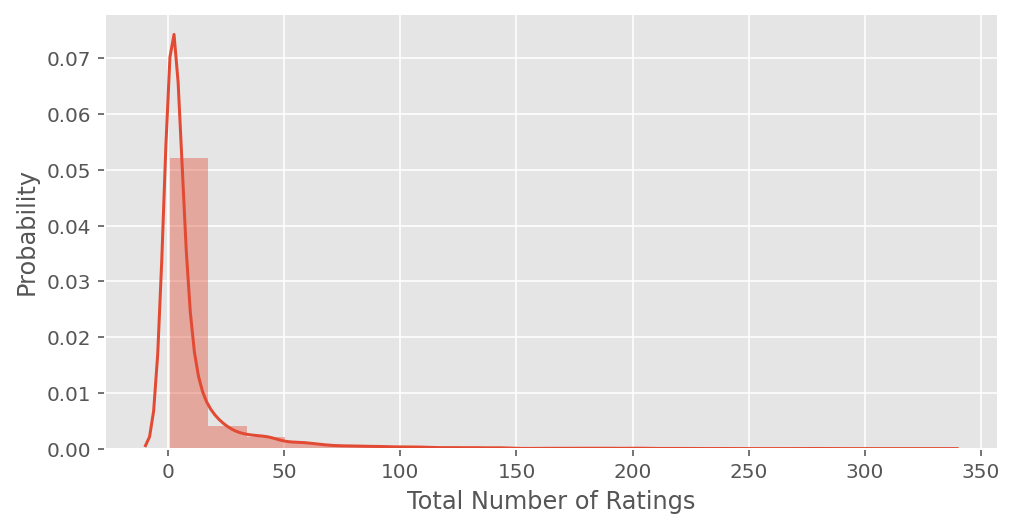

In [105]:
# Now we can see the plot showing the total rating and probability indicate that
# about lest than 1% of movies have more than 300 ratings 
# the majority of the movies have less than 50 ratings.

import seaborn as sns

plt.figure(figsize=(8,4))
sns.distplot(df_n_ratings['total ratings'], bins=20)
plt.xlabel('Total Number of Ratings')
plt.ylabel('Probability')
plt.show()

In [106]:
# using user-user collaborative filtering in order to calculate similarity of all user to active user. 
# then sort and filter top 20 users to make prediction for the active user

# first get the ratings and movie table
# mergedata


In [107]:
movies_clone = pd.read_csv('movies.csv')
ratings_clone = pd.read_csv('ratings.csv')
mergedata_clone = pd.merge(movies_clone,ratings_clone,on=['movieId','movieId'])
mergedata_clone.head(10)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5,1455209816
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,4.0,965705637
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,21,3.5,1407618878
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27,3.0,962685262
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,5.0,850466616


In [108]:
mergedata_clone.shape

(100836, 6)

In [109]:
# Crete user- item matrix
user_item_matrix = mergedata_clone.pivot_table(index='userId',columns='title', values='rating')
user_item_matrix.head(20)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [110]:
# User based collaborative filtering
user_user_matrix = user_item_matrix.copy()
user_user_matrix =user_user_matrix.apply(lambda row: row.fillna(row.mean()),axis=1)
user_user_matrix.head(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,...,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.000000,4.366379
2,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,...,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276
3,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,...,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897
4,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,...,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556
5,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,...,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364


In [111]:
user_user_matrix.T.corr()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.264516e-03,5.525772e-04,0.048419,0.021847,-0.045497,-6.199672e-03,0.047013,1.950985e-02,-8.754088e-03,...,0.018127,-0.017172,-0.015221,-3.705875e-02,-2.912138e-02,0.012016,0.055261,0.075224,-2.571255e-02,0.010932
2,0.001265,1.000000e+00,-8.476071e-25,-0.017164,0.021796,-0.021051,-1.111357e-02,-0.048085,-5.534891e-23,3.011629e-03,...,-0.050551,-0.031581,-0.001688,-3.345291e-23,-3.088913e-23,0.006226,-0.020504,-0.006001,-6.009100e-02,0.024999
3,0.000553,-8.476071e-25,1.000000e+00,-0.011260,-0.031539,0.004800,3.308497e-25,-0.032471,5.123183e-25,2.203980e-25,...,-0.004904,-0.016117,0.017749,3.085290e-25,-1.430628e-03,-0.037289,-0.007789,-0.013001,7.905178e-25,0.019550
4,0.048419,-1.716402e-02,-1.125978e-02,1.000000,-0.029620,0.013956,5.809139e-02,0.002065,-5.873603e-03,5.159032e-02,...,-0.037687,0.063122,0.027640,-1.378212e-02,4.003747e-02,0.020590,0.014628,-0.037569,-1.788358e-02,-0.000995
5,0.021847,2.179571e-02,-3.153892e-02,-0.029620,1.000000,0.009111,1.011715e-02,-0.012284,-1.950809e-24,-3.316512e-02,...,0.015964,0.012427,0.027076,1.246135e-02,-3.627206e-02,0.026319,0.031896,-0.001751,9.382892e-02,-0.000278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.012016,6.225827e-03,-3.728895e-02,0.020590,0.026319,-0.009137,2.832591e-02,0.022277,3.163273e-02,-3.994577e-02,...,0.053683,0.016384,0.098011,6.107833e-02,1.967830e-02,1.000000,0.017927,0.056676,3.842210e-02,0.075464
607,0.055261,-2.050374e-02,-7.789105e-03,0.014628,0.031896,0.045501,3.098070e-02,0.048822,-1.216061e-02,-1.765576e-02,...,0.049059,0.038197,0.049317,2.355180e-03,-2.938114e-02,0.017927,1.000000,0.044514,1.904919e-02,0.021860
608,0.075224,-6.000828e-03,-1.300064e-02,-0.037569,-0.001751,0.021727,2.841409e-02,0.071759,3.278284e-02,-5.199963e-02,...,0.069198,0.051388,0.012801,6.318649e-03,-7.977761e-03,0.056676,0.044514,1.000000,5.071449e-02,0.054454


In [112]:
user_correlation_matrix = user_user_matrix.T.corr()

In [113]:
#Get corraltion values between users to user 1.

def getCorrValuesOfUserX(userId):
    corr_user_X=user_correlation_matrix.iloc[userId-1]
    corr_user_X.sort_values(ascending=False, inplace=True)
    #Keep the DataFrame with valid entries in the same variable. Drop all NaN entries
    corr_user_X.dropna(inplace=True)
    return corr_user_X

In [114]:
userId=1
#corr_user_X =getCorrValuesOfUserX(userId)

In [119]:
corr_user_222 =getCorrValuesOfUserX(222)
print(corr_user_222)

userId
222    1.000000
249    0.141436
298    0.135259
302    0.132930
219    0.129168
         ...   
492   -0.044329
551   -0.045853
214   -0.047448
341   -0.071613
189   -0.071670
Name: 222, Length: 609, dtype: float64


In [120]:
# get the top 20-50 users 
def getTopUserInCorr(corr_user_X):  
    top_users = corr_user_X[1:40]
    return top_users


In [121]:
# List of movies that user X rated
mergedata_clone[mergedata_clone['userId']==userId]

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
325,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,964981247
433,6,Heat (1995),Action|Crime|Thriller,1,4.0,964982224
2107,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1,5.0,964983815
2379,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1,5.0,964982931
...,...,...,...,...,...,...
56816,3744,Shaft (2000),Action|Crime|Thriller,1,4.0,964980694
57276,3793,X-Men (2000),Action|Adventure|Sci-Fi,1,5.0,964981855
57457,3809,What About Bob? (1991),Comedy,1,4.0,964981220
59170,4006,Transformers: The Movie (1986),Adventure|Animation|Children|Sci-Fi,1,4.0,964982903


In [124]:
# example user X has not watched movieid 356 - Forrest Gump (1994)
# we can calculate what rating user X would give to the movie

#top_users_X = getTopUserInCorr(corr_user_X).keys()

#print(top_users_X)

In [125]:
#corr_X= getTopUserInCorr(corr_user_X)

In [126]:
def countUsers(top_users,target_movieID): 
    count = 0
    users = list()
    
    for u in top_users:
        if mergedata_clone[(mergedata_clone['userId']==u) & (mergedata_clone['movieId']==target_movieID)]['rating'].sum():
            count=count+1
            users.append(u)
    return count,users

In [127]:

#cnt,usersX= countUsers(top_users_X,318)

In [128]:
# we can predict the user rating by the formluar
# predicted rating = sum of [(weights *ratings]/sum of weight
# weight is the correlation of corresponding user to the target user

def predict_rating(userId,target_movieID):
    sum_corr= 0
    rating = 0
    corr_user_X =getCorrValuesOfUserX(userId)
    top_users_X = getTopUserInCorr(corr_user_X).keys()
    corr_X= getTopUserInCorr(corr_user_X)
    cnt,usersX= countUsers(top_users_X,target_movieID)
    
    for user in usersX:
        rating+= corr_X[user]* mergedata_clone[ (mergedata_clone['userId'] == user) & 
                                                              (mergedata_clone['movieId'] == target_movieID) ]['rating'].sum()
        sum_corr += corr_X[user]
    print(rating/sum_corr)
    predict_score= rating/sum_corr
    
    actual_mean_rating= df_n_ratings.at[target_movieID,"mean ratings"]
    with open('record.txt', 'a+') as f:
        f.seek(0)
        data = f.read(100)
        if len(data)>0:    
            f.write("\n")
        f.write(str(userId)+"|"+str(target_movieID)+"|"+str(predict_score)+"|"+str(actual_mean_rating))


In [129]:
# find the threshold rating of movie 356 
# if the predict rating is higher then the system can reccomend the movie to the user
df_n_ratings.sort_values('total ratings', ascending=False).head(10)

,mean ratings,total ratings
movieId,,
356,4.164134,329
318,4.429022,317
296,4.197068,307
593,4.161290,279
2571,4.192446,278
260,4.231076,251
480,3.750000,238
110,4.031646,237
589,3.970982,224


In [130]:
actual_mean_rating= df_n_ratings.at[593,"mean ratings"]


In [131]:
df_n_ratings.at[593,"mean ratings"]

4.161290322580645

In [133]:
id_user = 222
someth = final_recommendation_system(id_user)

3
cluster3
                                                Title  movieId
0                    Shawshank Redemption, The (1994)      318
1   Lord of the Rings: The Return of the King, The...     7153
2           Star Wars: Episode IV - A New Hope (1977)      260
3   Star Wars: Episode V - The Empire Strikes Back...     1196
4   Star Wars: Episode VI - Return of the Jedi (1983)     1210
5                                      Memento (2000)     4226
6                                        Shrek (2001)     4306
7                    Silence of the Lambs, The (1991)      593
8        Eternal Sunshine of the Spotless Mind (2004)     7361
9                              American Beauty (1999)     2858
10                              Monsters, Inc. (2001)     4886
11                           Good Will Hunting (1997)     1704
12             Monty Python and the Holy Grail (1975)     1136
13                        Bourne Identity, The (2002)     5418
14                                      WALL

In [134]:

newlis = []
for i in range(0,len(someth["movieId"])):
    newlis.append(someth["movieId"][i])
    
print(newlis)

[318, 7153, 260, 1196, 1210, 4226, 4306, 593, 7361, 2858, 4886, 1704, 1136, 5418, 60069, 3147, 1, 3793, 4011, 4878, 1291, 48780, 49272, 2502]


In [137]:
# Call function to predict a rating score of an unseen movie by a user
# input = userId(int) and movieId(int)
# the id of unseen movie can be found in previous step. find recommended movie
predict_rating(id_user, 4306)

3.5015990756586324


In [136]:
for i in newlis:
    predict_rating(id_user, i)

4.5623047136850445
4.167678322208866
4.451892013139037
4.561737565312082
4.360645408038743
4.401099929091172
3.5015990756586324
4.1178914275066845
4.2198945731836
4.177329901568348
3.5695959625174183
4.370270091137107
4.1116125725017065
3.8972492134020915
4.178905973077582
4.00943252471076
3.610326285765073
3.6301586588602737
4.261059411874691
4.2721655553007905
4.0952118619837785
3.933184045632376
4.038367938137719
4.113205033727876


In [138]:
# measure the accuracy for recommendation system using root mean square error
# MSE is a risk function that helps us determine the average squared difference between the predicted and the actual value

with open("record.txt") as file:
    lines = [line.rstrip('\n') for line in file]
    
    
predict_ratings=[]
actual_ratings=[]

for line in lines:
    temp = line.split("|")
    predict_ratings.append(float(temp[2]))
    actual_ratings.append(float(temp[3]))


In [139]:
from sklearn.metrics import mean_squared_error
import math

 
MSE = mean_squared_error(actual_ratings, predict_ratings)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.2691006205718053


In [ ]:
# it can be said that RMSE values between 0.2 and 0.5 shows that the recommantion system can relatively predict the data accurately